<a href="https://colab.research.google.com/github/andregll/StockPredictionRegression/blob/master/Week3HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance upgrade no cache dir
yf.pdr_override()



from google.colab import drive



from sklearn.linear_model  import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics

  ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [2]:
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/Week3"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Week3


IMPORT DATA

In [3]:
df_full = pdr.get_data_yahoo("GE", start="2018-01-01").reset_index()
df_full.to_csv('output/GE.csv',index=False)

[*********************100%***********************]  1 of 1 downloaded


In [4]:
df_full.shape

(428, 7)

In [5]:
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.903847,17.298077,16.855770,17.288462,16.741257,80673100
1,2018-01-03,17.596153,17.634615,17.336538,17.451923,16.899548,84731100
2,2018-01-04,17.673077,17.903847,17.596153,17.817308,17.253370,85856600
3,2018-01-05,18.134615,18.144230,17.788462,17.826923,17.262678,83074800
4,2018-01-08,17.951923,17.980770,17.403847,17.576923,17.020590,85381500


In [6]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,428.000000,428.000000,428.000000,428.000000,428.000000,4.280000e+02
mean,11.269273,11.434495,11.087423,11.246652,11.105600,8.757026e+07
std,2.464329,2.462420,2.446746,2.445178,2.306210,5.402407e+07
min,6.576923,6.759615,6.403846,6.451923,6.422756,2.217560e+07
25%,9.485289,9.670000,9.287500,9.490000,9.477473,5.173280e+07
50%,10.715000,10.820000,10.519807,10.630000,10.613526,7.106985e+07
75%,13.182693,13.355769,13.009615,13.139423,12.924086,1.045056e+08
max,18.490385,18.644230,18.269230,18.288462,17.709608,4.010487e+08


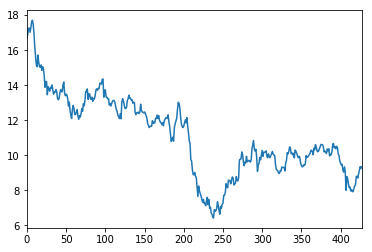

In [7]:
df_full["Adj Close"].plot()

PREPROCESSING


In [0]:
df_full.set_index("Date", inplace=True)


In [0]:
window_size = 32
num_samples=len(df_full)-window_size

indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices]
x = data[:,:-1]
y = data[:,-1]






SPLITTING THE DATA BETWEEN TEST AND TRAIN

In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [12]:
x_train.shape


(316, 32)

MODELING

In [0]:
 #Help Functions
  def get_performance (model_pred):
          #Function returns standard performance metrics",
       print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4)),
       print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4)),
       print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4)),
         
  def get_plot (model_pred):
      plt.scatter(model_pred, y_test, color="gray")
      plt.plot(y_test, y_test, color='red', linewidth=2)


In [0]:
y_pred_lag=np.roll(y_test,1)

In [23]:
get_performance(y_pred_lag)

Mean Absolute Error: 0.1725
Mean Squared Error: 0.0588
Root Mean Squared Error: 0.2426


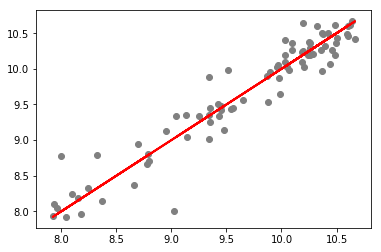

In [24]:
get_plot(y_pred_lag)

Linear regression

In [25]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [27]:
get_performance(y_pred_lr)

Mean Absolute Error: 0.1728
Mean Squared Error: 0.0588
Root Mean Squared Error: 0.2424


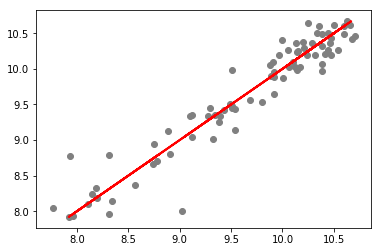

In [28]:
get_plot(y_pred_lr)

In [29]:
get_performance(y_pred_lr)

Mean Absolute Error: 0.1728
Mean Squared Error: 0.0588
Root Mean Squared Error: 0.2424


RidgeRegression

In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [31]:
get_performance(y_pred_ridge)

Mean Absolute Error: 0.1704
Mean Squared Error: 0.0577
Root Mean Squared Error: 0.2402


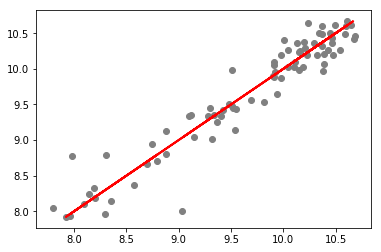

In [32]:
get_plot(y_pred_ridge)

GradientBoosting Trees

In [0]:
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

y_pred_gb = model_gb.predict(x_test)

In [35]:
get_performance(y_pred_gb)

Mean Absolute Error: 0.2151
Mean Squared Error: 0.0826
Root Mean Squared Error: 0.2875


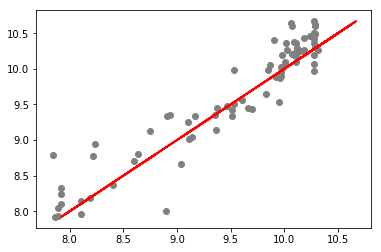

In [36]:
get_plot(y_pred_gb)